### Простой NLP пример

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,  GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def text_preprocess(text):    
    reg = re.compile('[^а-яА-Яa-zA-Z0-9]') #
    text = text.lower()
    text = reg.sub(' ', text)
    lemmatizer = WordNetLemmatizer()
    text_ =''
    for word in text.split():
        #text_.append(lemmatizer.lemmatize(word))
        text_ = text_+ ' ' + lemmatizer.lemmatize(word)
    return text_

#### Загрузка данных из csv файла

In [ ]:
df = pd.read_csv('sms/spam.csv', encoding="latin-1")
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['v2'].iloc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

#### Подготовка данных

In [ ]:
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

In [ ]:
df['v2'] = df['v2'].apply(text_preprocess)

In [ ]:
df['v2'].iloc[2]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s'

In [ ]:
def f(x, ....):
    x[v1]
    x[v2]....

df['v2_new'] = df.apply(lambda x: f(x, ....... ) , axis = 1)

In [ ]:
df.head()

,v1,v2,label
0,ham,go until jurong point crazy available only in...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fin...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i don t think he go to usf he life around...,0


In [ ]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [ ]:
X = df['v2']
y = df['label']
#cv = CountVectorizer() # Bag of WORDS (BOW)
cv = TfidfVectorizer()
X = cv.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)

Accuracy:  0.9793365959760739
Recall:  0.9206349206349206
Precision:  0.928
F1:  0.9243027888446215
Roc_AUC:  0.9546463828127343


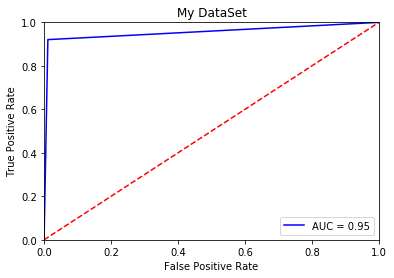

In [ ]:
value_of_metrics(y_test, y_pred)

Accuracy:  0.955410549211528
Recall:  0.6746031746031746
Precision:  1.0
F1:  0.8056872037914692
Roc_AUC:  0.8373015873015873


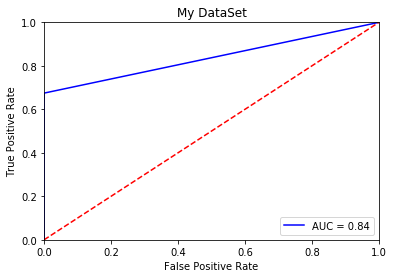

In [ ]:
value_of_metrics(y_test, y_pred)

### Векторные представления документов с помощью SVD разложений

In [ ]:
#обучаем tf_idf vectorizer ---------------------------------
tfidf = TfidfVectorizer()
sms_tf_idf = tfidf.fit_transform(df['v2'])
#обучаем tf_idf vectorizer ---------------------------------

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sms_tf_idf, y, test_size=0.33, random_state=42)

In [ ]:
#находим svd разложение---------------------------------------
svd = TruncatedSVD(80)
lsa = make_pipeline(svd, Normalizer(copy=False))
#находим svd разложение---------------------------------------

In [ ]:
sms_svd_train = lsa.fit_transform(X_train)

In [ ]:
sms_svd_train.shape

(3733, 80)

In [ ]:
sms_svd_train[0]

array([ 0.47684354,  0.02336576,  0.10808429,  0.00936714, -0.0416762 ,
       -0.12268978,  0.24163549,  0.06427661,  0.11813401,  0.02098399,
        0.32414095, -0.26790802,  0.07165351, -0.03234406, -0.09500948,
       -0.18534405, -0.06373009, -0.20985034,  0.0417371 , -0.10241831,
       -0.14455837, -0.04271965, -0.03219546, -0.02727121, -0.10484639,
        0.18593394,  0.07910484, -0.05692433, -0.20004424, -0.20090167,
       -0.11275444, -0.10509018,  0.02932791, -0.14964208, -0.02850823,
       -0.03581049,  0.03373392, -0.00640829, -0.10197941,  0.01537982,
       -0.00476028,  0.04221703,  0.01749142, -0.07366425, -0.10251243,
       -0.06771644, -0.01561836, -0.12898078,  0.10956101,  0.0033725 ,
       -0.08682197,  0.00073832, -0.03040141,  0.05137349, -0.03745858,
       -0.01218503, -0.04070253,  0.02881306, -0.18139288,  0.01022785,
       -0.03893296,  0.00291324,  0.0415237 ,  0.04104729, -0.00548023,
        0.01108124, -0.01162079,  0.07553721,  0.01439704,  0.05

In [ ]:
#clf = SVC()
clf = GaussianNB()
clf.fit(sms_svd_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
sms_svd_test = lsa.transform(X_test)

In [ ]:
y_pred = clf.predict(sms_svd_test)

Accuracy:  0.9651984774333877
Recall:  0.8492063492063492
Precision:  0.8916666666666667
F1:  0.8699186991869918
Roc_AUC:  0.9164116182074595


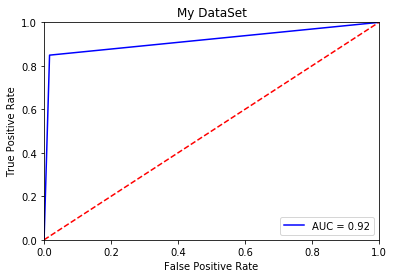

In [ ]:
value_of_metrics(y_test, y_pred)